# Training

### Load the pre-processed data

In [1]:
import numpy as np
import pandas as pd

#Load all cleaned data
X = pd.read_csv('Inputs\\cleaned\\DataReady.csv')

In [2]:
#Initiate X and y
y = X.pop('Label')
print(X.shape)

(5996063, 70)


In [3]:
X

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0,0,112641719,3,0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0.0,0.0,0.0,0.0,56320859.5,139.300036,56320958.0,56320761.0
1,22,6,6453966,15,10,1239.0,2273.0,744.0,0.0,82.600000,...,6,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,22,6,8804066,14,11,1143.0,2209.0,744.0,0.0,81.642857,...,6,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,22,6,6989341,16,12,1239.0,2273.0,744.0,0.0,77.437500,...,7,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,80,6,474670,5,3,214.0,466.0,214.0,0.0,42.800000,...,1,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5996058,3389,6,4220892,14,8,1441.0,1731.0,725.0,0.0,102.928571,...,7,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5996059,3389,6,4305082,14,8,1440.0,1731.0,725.0,0.0,102.857143,...,7,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5996060,80,6,5598105,4,4,97.0,231.0,97.0,0.0,24.250000,...,1,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5996061,53,17,35158,2,2,64.0,242.0,32.0,32.0,32.000000,...,1,8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


## Create Training & Testing Sets

In [4]:
from sklearn.model_selection import train_test_split

#Separate data into Training and Testing sets. Pick 25% for the Testing Set and 75% for the Training Set. Allocating a high percentage for Training at this stage
# due to the low number of samples in some of the classes 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75, stratify = y, random_state=4)
X_train = X_train.copy()    #Just so that Python won't have any confusion as to whether this is a view or a copy
X_test = X_test.copy()

In [5]:
#Inspect the distribution of classes in both Training and Testing sets
dist = pd.DataFrame()
dist['y_train Freq'] = y_train.value_counts()
dist['y_train %'] = y_train.value_counts(normalize=True)
dist['y_test Freq'] = y_test.value_counts()
dist['y_test %'] = y_test.value_counts(normalize=True)
dist.style.format("{:.3%}", subset=['y_train %', 'y_test %'])

,y_train Freq,y_train %,y_test Freq,y_test %
Label,,,,
Benign,2541764,56.521%,847255,56.521%
DDOS attack-HOIC,514509,11.441%,171503,11.441%
DDoS attacks-LOIC-HTTP,432143,9.609%,144048,9.610%
DoS attacks-Hulk,346434,7.704%,115478,7.704%
Bot,214643,4.773%,71548,4.773%
FTP-BruteForce,145015,3.225%,48339,3.225%
SSH-Bruteforce,140692,3.129%,46897,3.129%
Infilteration,120479,2.679%,40160,2.679%
DoS attacks-GoldenEye,31131,0.692%,10377,0.692%


In [6]:
X_train

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
1730663,80,6,24150,2,0,0.0,0.0,0.0,0.0,0.000000,...,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4615925,50901,6,25,1,1,0.0,0.0,0.0,0.0,0.000000,...,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
665452,53,17,18934,1,1,49.0,126.0,49.0,49.0,49.000000,...,0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1237274,42678,6,4619523,5,3,935.0,364.0,935.0,0.0,187.000000,...,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3775003,80,6,731,2,0,0.0,0.0,0.0,0.0,0.000000,...,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3973484,59469,6,1308,5,2,935.0,312.0,935.0,0.0,187.000000,...,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3776272,80,6,9745,3,4,298.0,935.0,298.0,0.0,99.333333,...,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22986,21,6,2,1,1,0.0,0.0,0.0,0.0,0.000000,...,0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4037135,50884,6,1136,5,2,935.0,273.0,935.0,0.0,187.000000,...,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
print('Size of Training Set: ', len(X_train))
print('Size of Testing Set: ', len(X_test))

Size of Training Set:  4497047
Size of Testing Set:  1499016


## Save the Testing set

Testing set is saved to a separate file and will no longer be amended or inspected until towards the end of the project where we test the chosen model

In [ ]:
#Save the testing set
filename_out = 'Inputs\\train_test_sets\\testing.csv'
X_test.join(y_test).to_csv(filename_out, index=False)

## Exploration analysis of the Training Set

In [8]:
X_train.nunique()

Dst Port           64412
Protocol               3
Flow Duration    1379894
Tot Fwd Pkts        2484
Tot Bwd Pkts         872
                  ...   
Active Min         63352
Idle Mean         309124
Idle Std           68030
Idle Max          291562
Idle Min          302797
Length: 70, dtype: int64

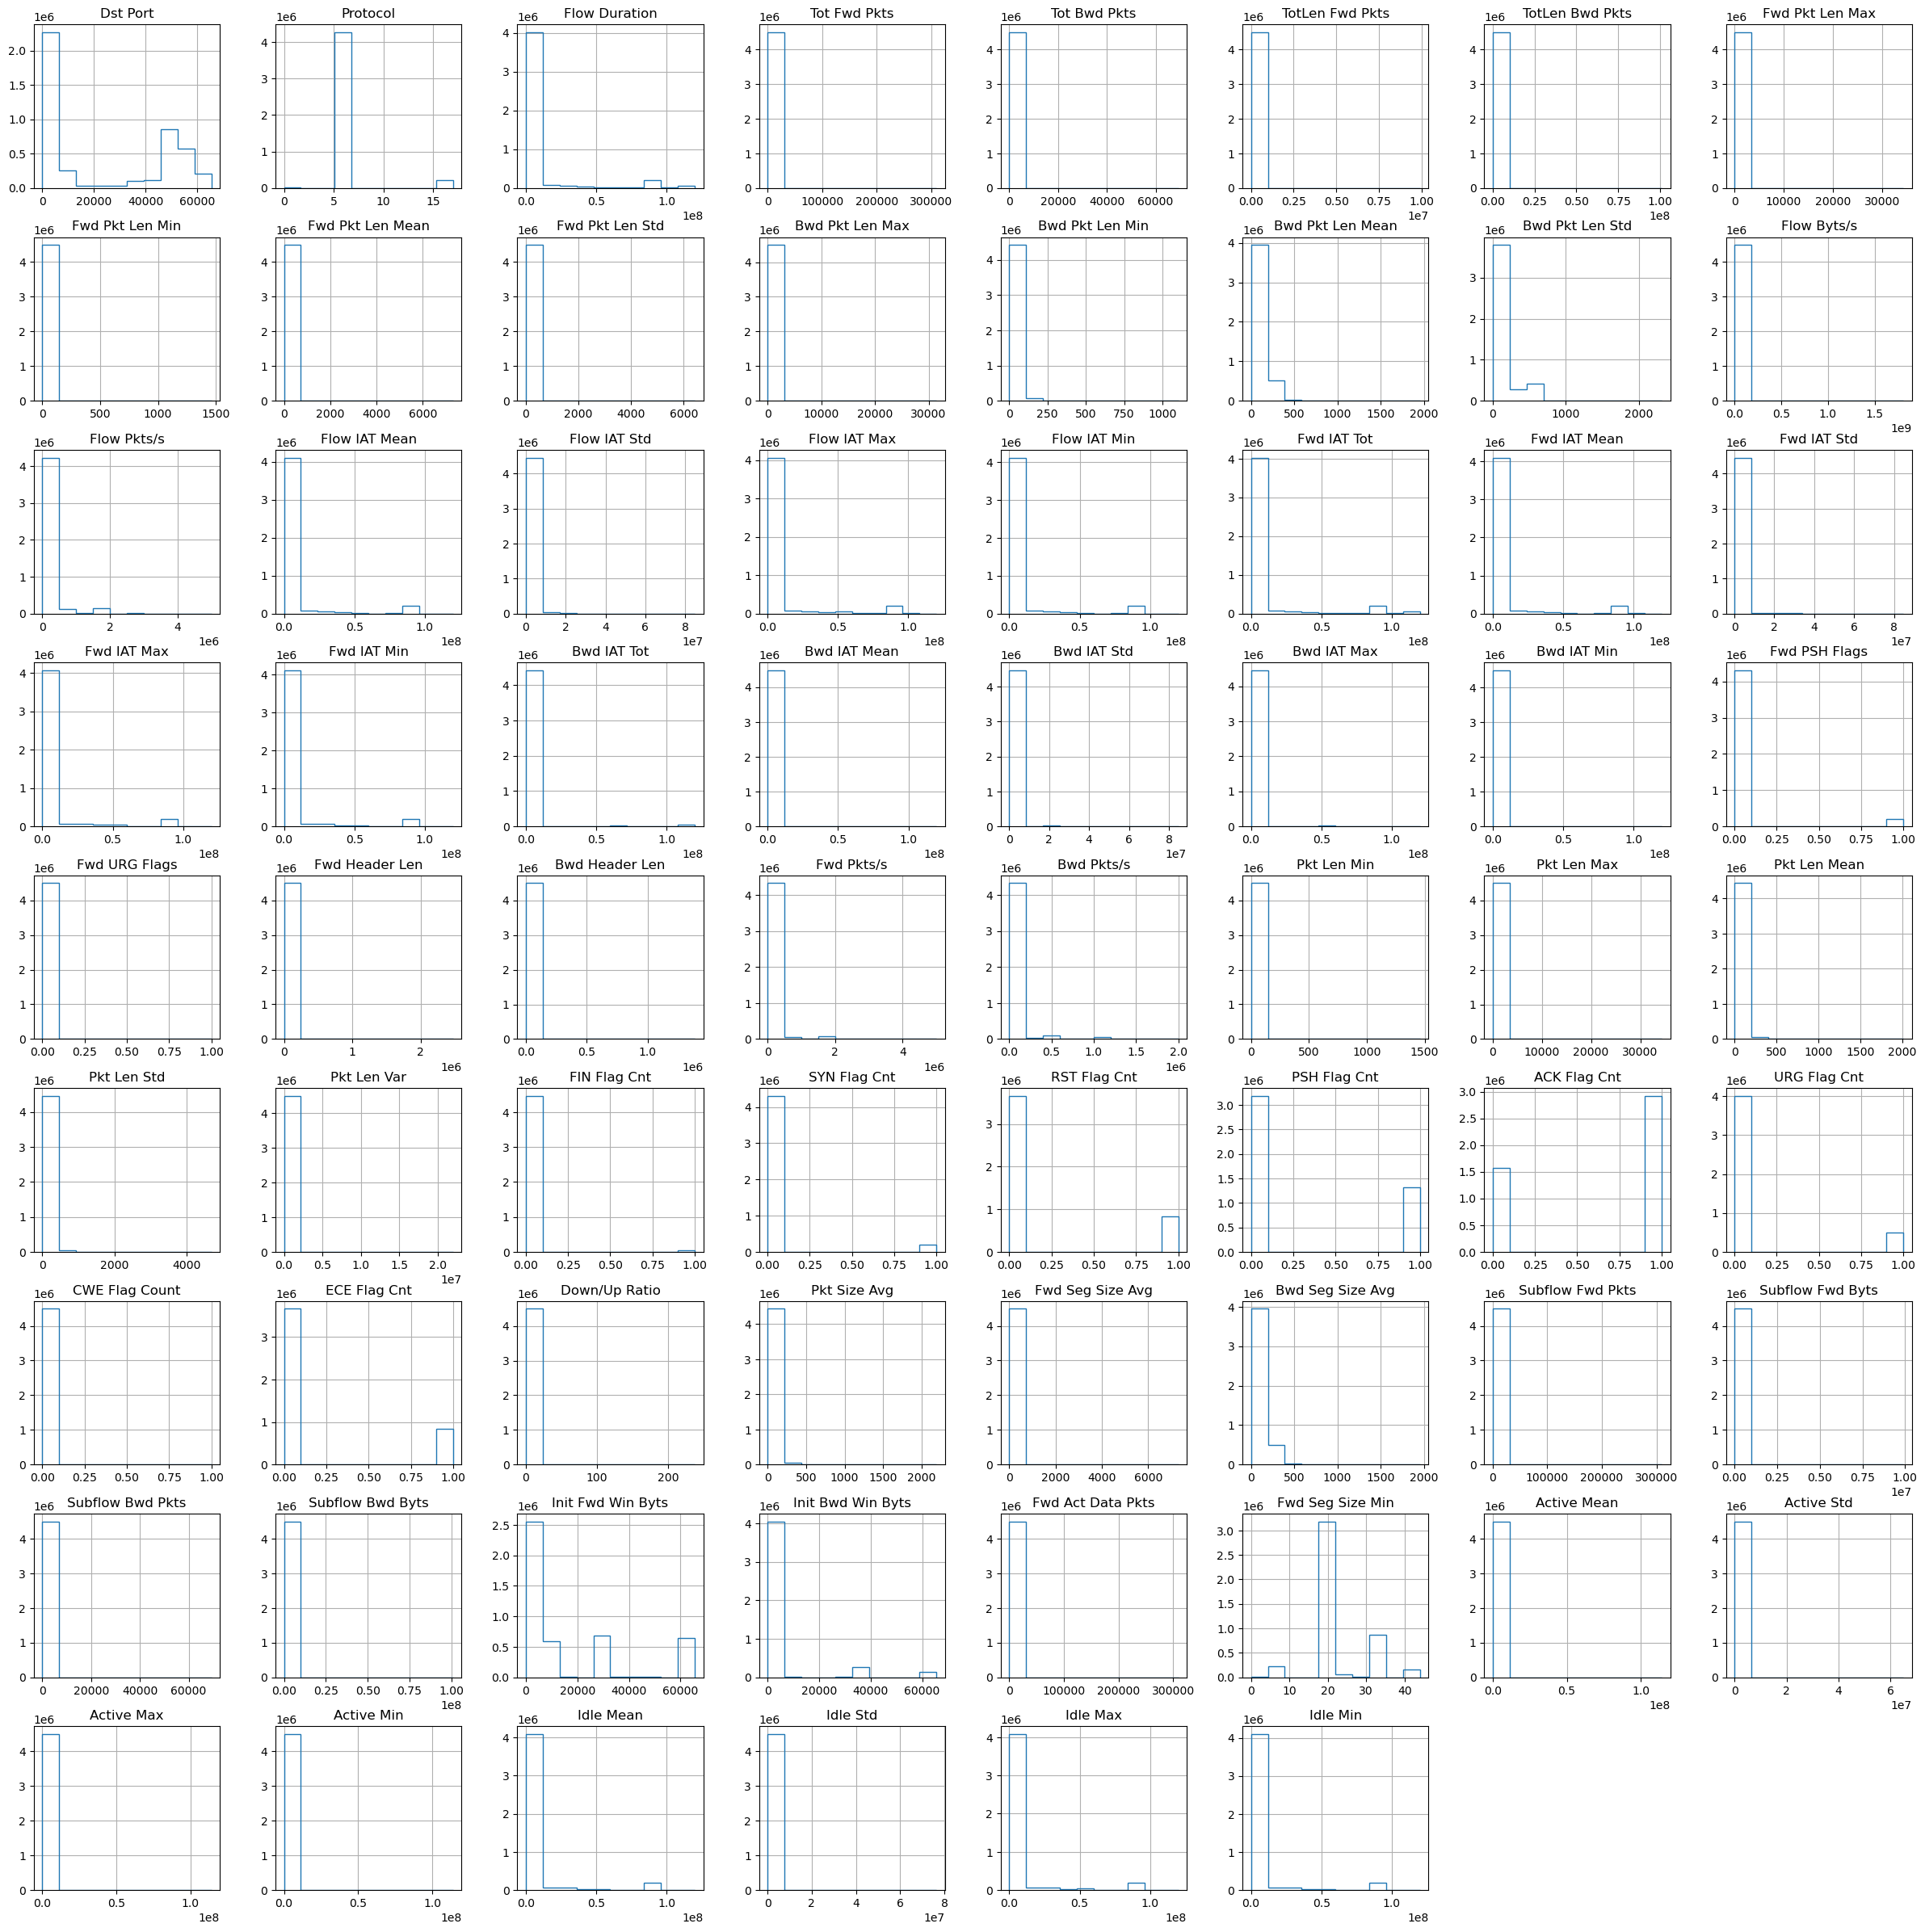

In [9]:
#check the distribution of each feature
X_train.hist(figsize=(30, 30), histtype = 'step', bins=10);

**Observations:** Lot of the features seem to have right-skewed data which might indicate a logarithmic distribution. These could be suitable candidates for a log transformation or a QuantileTransformer (depending on the classifier we end up using). To be explored further at a later stage depending on the chosen classifier.

**Observations:**
- There are 2 categorical columns: Protocol and Dst Port
- All other columns are numerical


In [11]:
X_train['Protocol'].value_counts()

Protocol
6     4266936
17     218217
0       11894
Name: count, dtype: int64

**Note:**
* Protocol 6 refers to TCP 
* Protocol 17 refers to UDP
* Protocol 0 refers to HOPOPT (IPv6 Hop-by-Hop Option)

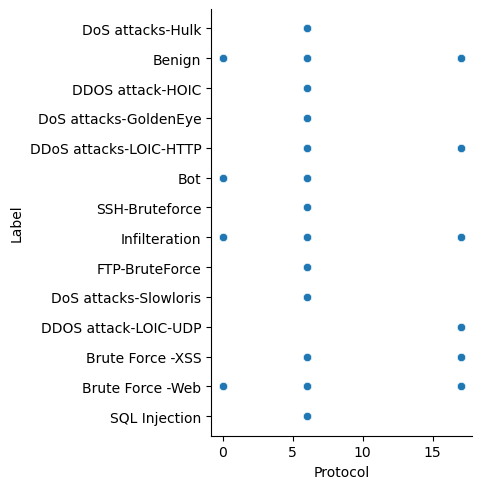

In [12]:
import seaborn as sns

sns.relplot(x='Protocol', y='Label', data=X_train.join(y_train));

## Duplicate removal in Training Set

In [13]:
#Check for duplicates 
dupRows = X_train.duplicated()
print('Duplicate Rows: ', dupRows.sum(), 'Duplicated %:', dupRows.sum()/len(X_train)*100)

Duplicate Rows:  1028524 Duplicated %: 22.871097411256766


In [14]:
#Inspect the distribution of classes that are duplicated
dist = pd.DataFrame()
dist['Label Freq'] = y_train.value_counts()
dist['Label %'] = y_train.value_counts(normalize=True)
dist['Dup Label Freq'] = y_train[dupRows].value_counts(dropna=False)
dist['Dup Label %'] = dist['Dup Label Freq'] / dist['Label Freq']
dist [dist.isna()] = 0
dist['Dup Label Freq'] = dist['Dup Label Freq'].astype('int32')
dist.style.format("{:.3%}", subset=['Label %', 'Dup Label %']).format("{:,d}", subset=['Label Freq', 'Dup Label Freq'])

,Label Freq,Label %,Dup Label Freq,Dup Label %
Label,,,,
Benign,"2,541,764",56.521%,"101,914",4.010%
DDOS attack-HOIC,"514,509",11.441%,"358,053",69.591%
DDoS attacks-LOIC-HTTP,"432,143",9.609%,470,0.109%
DoS attacks-Hulk,"346,434",7.704%,"226,840",65.479%
Bot,"214,643",4.773%,"106,038",49.402%
FTP-BruteForce,"145,015",3.225%,"144,962",99.963%
SSH-Bruteforce,"140,692",3.129%,"70,214",49.906%
Infilteration,"120,479",2.679%,"19,164",15.907%
DoS attacks-GoldenEye,"31,131",0.692%,54,0.173%


The Benign class has 4% duplicates. These can be safely removed.
For the "FTP-BruteForce" class, nearly all of the samples are duplicates. This is most likely an expected characteristic of their attack vector, as they need to carry out repetative attacks on their targets. It would be advantageous to remove most of those duplicates if the dataset would return to a more balanced state as a result of that duplicate removal.
These are the classes in which we can remove majority of the duplicates: FTP-BruteForce, DoS attacks-Hulk, Bot, SSH-Bruteforce and DoS attacks-SlowHTTPTest

In [15]:
rowsToDrop = y_train[dupRows] == 'Benign' 


In [16]:
X_train.filter(items=rowsToDrop[ rowsToDrop == True].index, axis=0).count()

Dst Port         101914
Protocol         101914
Flow Duration    101914
Tot Fwd Pkts     101914
Tot Bwd Pkts     101914
                  ...  
Active Min       101914
Idle Mean        101914
Idle Std         101914
Idle Max         101914
Idle Min         101914
Length: 70, dtype: int64

In [17]:
len(X_train), len(y_train)


(4497047, 4497047)

In [18]:
#Delete all the duplicates off the Benign class
rowsToDrop = (y_train[dupRows] == 'Benign')
print('Training Set size before duplicate removal within the Benign class: ', len(X_train))
X_train.drop(labels=rowsToDrop[ rowsToDrop == True].index, axis=0, inplace=True)
y_train.drop(labels=rowsToDrop[ rowsToDrop == True].index, axis=0, inplace=True)
print('Training Set size after duplicate removal within the Benign class: ', len(X_train))

Training Set size before duplicate removal within the Benign class:  4497047
Training Set size after duplicate removal within the Benign class:  4395133


In [19]:
#Delete all of the duplicates off the DDOS attack-HOIC class
rowsToDrop = (y_train[dupRows] == 'DDOS attack-HOIC')
print('Training Set size before duplicate removal within the DDOS attack-HOIC class: ', len(X_train))
X_train.drop(labels=rowsToDrop[ rowsToDrop == True].index, axis=0, inplace=True)
y_train.drop(labels=rowsToDrop[ rowsToDrop == True].index, axis=0, inplace=True)
print('Training Set size after duplicate removal within the DDOS attack-HOIC class: ', len(X_train))

Training Set size before duplicate removal within the DDOS attack-HOIC class:  4395133
Training Set size after duplicate removal within the DDOS attack-HOIC class:  4037080


In [20]:
#Delete 80% of the duplicates off the DoS attacks-Hulk class
rowsToDrop = (y_train[dupRows] == 'DoS attacks-Hulk')
rowsToDrop_Indexes = rowsToDrop[ rowsToDrop == True].sample(frac=0.80, random_state=4, axis=0).index

print('Training Set size before duplicate removal within the DoS attacks-Hulk class: ', len(X_train))
X_train.drop(labels=rowsToDrop_Indexes, axis=0, inplace=True)
y_train.drop(labels=rowsToDrop_Indexes, axis=0, inplace=True)
print('Training Set size after duplicate removal within the DoS attacks-Hulk class: ', len(X_train))

Training Set size before duplicate removal within the DoS attacks-Hulk class:  4037080
Training Set size after duplicate removal within the DoS attacks-Hulk class:  3855608


In [21]:
#Delete 80% of the duplicates off the Bot class
rowsToDrop = (y_train[dupRows] == 'Bot')
rowsToDrop_Indexes = rowsToDrop[ rowsToDrop == True].sample(frac=0.80, random_state=4, axis=0).index

print('Training Set size before duplicate removal within the Bot class: ', len(X_train))
X_train.drop(labels=rowsToDrop_Indexes, axis=0, inplace=True)
y_train.drop(labels=rowsToDrop_Indexes, axis=0, inplace=True)
print('Training Set size after duplicate removal within the Bot class: ', len(X_train))

Training Set size before duplicate removal within the Bot class:  3855608
Training Set size after duplicate removal within the Bot class:  3770778


In [22]:
#Delete 80% of the duplicates off the FTP-BruteForce class
rowsToDrop = (y_train[dupRows] == 'FTP-BruteForce')
rowsToDrop_Indexes = rowsToDrop[ rowsToDrop == True].sample(frac=0.80, random_state=4, axis=0).index

print('Training Set size before duplicate removal within the FTP-BruteForce class: ', len(X_train))
X_train.drop(labels=rowsToDrop_Indexes, axis=0, inplace=True)
y_train.drop(labels=rowsToDrop_Indexes, axis=0, inplace=True)
print('Training Set size after duplicate removal within the FTP-BruteForce class: ', len(X_train))

Training Set size before duplicate removal within the FTP-BruteForce class:  3770778
Training Set size after duplicate removal within the FTP-BruteForce class:  3654808


In [23]:
#Delete 80% of the duplicates off the SSH-Bruteforce class
rowsToDrop = (y_train[dupRows] == 'SSH-Bruteforce')
rowsToDrop_Indexes = rowsToDrop[ rowsToDrop == True].sample(frac=0.80, random_state=4, axis=0).index

print('Training Set size before duplicate removal within the SSH-Bruteforce class: ', len(X_train))
X_train.drop(labels=rowsToDrop_Indexes, axis=0, inplace=True)
y_train.drop(labels=rowsToDrop_Indexes, axis=0, inplace=True)
print('Training Set size after duplicate removal within the SSH-Bruteforce class: ', len(X_train))

Training Set size before duplicate removal within the SSH-Bruteforce class:  3654808
Training Set size after duplicate removal within the SSH-Bruteforce class:  3598637


In [24]:
#Now re-check for duplicates 
dupRows2 = X_train.duplicated()
print('Duplicate Rows: ', dupRows2.sum(), 'Duplicated %:', dupRows2.sum()/len(X_train)*100)

#Inspect the distribution of classes that are duplicated
dist = pd.DataFrame()
dist['Label Freq'] = y_train.value_counts()
dist['Label %'] = y_train.value_counts(normalize=True)
dist['Dup Label Freq'] = y_train[dupRows2].value_counts(dropna=False)
dist['Dup Label %'] = dist['Dup Label Freq'] / dist['Label Freq']
dist [dist.isna()] = 0
dist['Dup Label Freq'] = dist['Dup Label Freq'].astype('int32')
dist.style.format("{:.3%}", subset=['Label %', 'Dup Label %']).format("{:,d}", subset=['Label Freq', 'Dup Label Freq'])

Duplicate Rows:  130114 Duplicated %: 3.6156467017929286


,Label Freq,Label %,Dup Label Freq,Dup Label %
Label,,,,
Benign,"2,439,850",67.799%,0,0.000%
DDoS attacks-LOIC-HTTP,"432,143",12.009%,470,0.109%
DoS attacks-Hulk,"164,962",4.584%,"45,368",27.502%
DDOS attack-HOIC,"156,456",4.348%,0,0.000%
Bot,"129,813",3.607%,"21,208",16.337%
Infilteration,"120,479",3.348%,"19,164",15.907%
SSH-Bruteforce,"84,521",2.349%,"14,043",16.615%
DoS attacks-GoldenEye,"31,131",0.865%,54,0.173%
FTP-BruteForce,"29,045",0.807%,"28,992",99.818%


In [25]:
#Further cull the Benign class so their sample sizes would come closer to the other major classes
rowsToDrop_Indexes = y_train[ y_train == 'Benign'].sample(frac=0.95, axis=0).index

print('Training Set size before further culling of the Benign class: ', len(X_train))
X_train.drop(labels=rowsToDrop_Indexes, axis=0, inplace=True)
y_train.drop(labels=rowsToDrop_Indexes, axis=0, inplace=True)
print('Training Set size after further culling of the Benign class: ', len(X_train))

Training Set size before further culling of the Benign class:  3598637
Training Set size after further culling of the Benign class:  1280779


In [26]:
#Further cull the DDoS attacks-LOIC-HTTP classes so their sample sizes would come closer to the other major classes
rowsToDrop_Indexes = y_train[ y_train == 'DDoS attacks-LOIC-HTTP'].sample(frac=0.65, axis=0).index

print('Training Set size before further culling of the DDoS attacks-LOIC-HTTP class: ', len(X_train))
X_train.drop(labels=rowsToDrop_Indexes, axis=0, inplace=True)
y_train.drop(labels=rowsToDrop_Indexes, axis=0, inplace=True)
print('Training Set size after further culling of the DDoS attacks-LOIC-HTTP class: ', len(X_train))

Training Set size before further culling of the DDoS attacks-LOIC-HTTP class:  1280779
Training Set size after further culling of the DDoS attacks-LOIC-HTTP class:  999886


In [27]:
#Inspect the distribution of classes in both Training and Testing sets
dist = pd.DataFrame()
dist['y_train Freq'] = y_train.value_counts()
dist['y_train %'] = y_train.value_counts(normalize=True)
dist['y_test Freq'] = y_test.value_counts()
dist['y_test %'] = y_test.value_counts(normalize=True)
dist.style.format("{:.3%}", subset=['y_train %', 'y_test %'])

,y_train Freq,y_train %,y_test Freq,y_test %
Label,,,,
DoS attacks-Hulk,164962,16.498%,115478,7.704%
DDOS attack-HOIC,156456,15.647%,171503,11.441%
DDoS attacks-LOIC-HTTP,151250,15.127%,144048,9.610%
Bot,129813,12.983%,71548,4.773%
Benign,121992,12.201%,847255,56.521%
Infilteration,120479,12.049%,40160,2.679%
SSH-Bruteforce,84521,8.453%,46897,3.129%
DoS attacks-GoldenEye,31131,3.113%,10377,0.692%
FTP-BruteForce,29045,2.905%,48339,3.225%


## Categorical columns

As all the columns of the Dataset are numerical, it would be relatively easy to train an ML model using this dataset - as if any of the columns contained text-based categorical data, we would have had to go through an extra step of encoding that categorical data (eg through the use of an ordinal encorder or a one-hot encoder).

This datast does have 2 categorical columns: Protocol and Dst Port. But both of those columns are intrinsically encoded in an ordinal numerical format. However, given the Protocol column only has 3 unique values (0, 6 and 17), it would be preferrable to transform that column to 3 separate columns using a One-Hot Encoder. This will ensure no ML model will misinterpret the Protocol column's ordinal encoding (eg some ML algorithms might treat Protocol 17 to be "greater" than Protocol 0 since 17 > 0). 

This transformation of an ordinal column to one-hot encoding won't be required for the Dst Port column. This is because:
* There is some ordinal relationship in the ordering of Dst Port numbers. Eg "Well Known Ports" are in the range of 1 to 1023, "Registered Ports" are in the range of 1024 to 49151, while "Dynamic Ports" are in the range of 49152 to 65535. 
* There are too many unique values in the Dst Port column. One Hot encoding will produce too many columns in the dataset (its dimensionality will increase by about 50k)! This will make the model unnecessarily slow, so will not be justified.

It would be worthwhile to encode the Dst Port column to these 3 bins: "Well Known Ports", "Registered Ports" and "Dynamic Ports". This could result in the addition of one ordinal column to the dataset (eg called "Dst Port Class")

Also note that there is no missing data so we will not require to add any imputers to the pipeline. There were some missing data found with the original dataset, but those missing data were associated with samples that were invalid in the first place. Removal of those invalid samples have also meant that we no longer have any samples with missing data!

In [28]:
def Dst_Port_Class(Dst_Port):
    if (Dst_Port < 1024):
        return 0    # These are the "Well Known Ports"
    elif (Dst_Port < 49152):
        return 1    # These are the "Registered Ports"
    else:
        return 2    # These are the "Dynamic Ports"


In [29]:
#Add an ordinal column for Dst Port Class
X_train['Dst Port Class'] = X_train['Dst Port'].apply(Dst_Port_Class)

## Check for outliers

<Axes: >

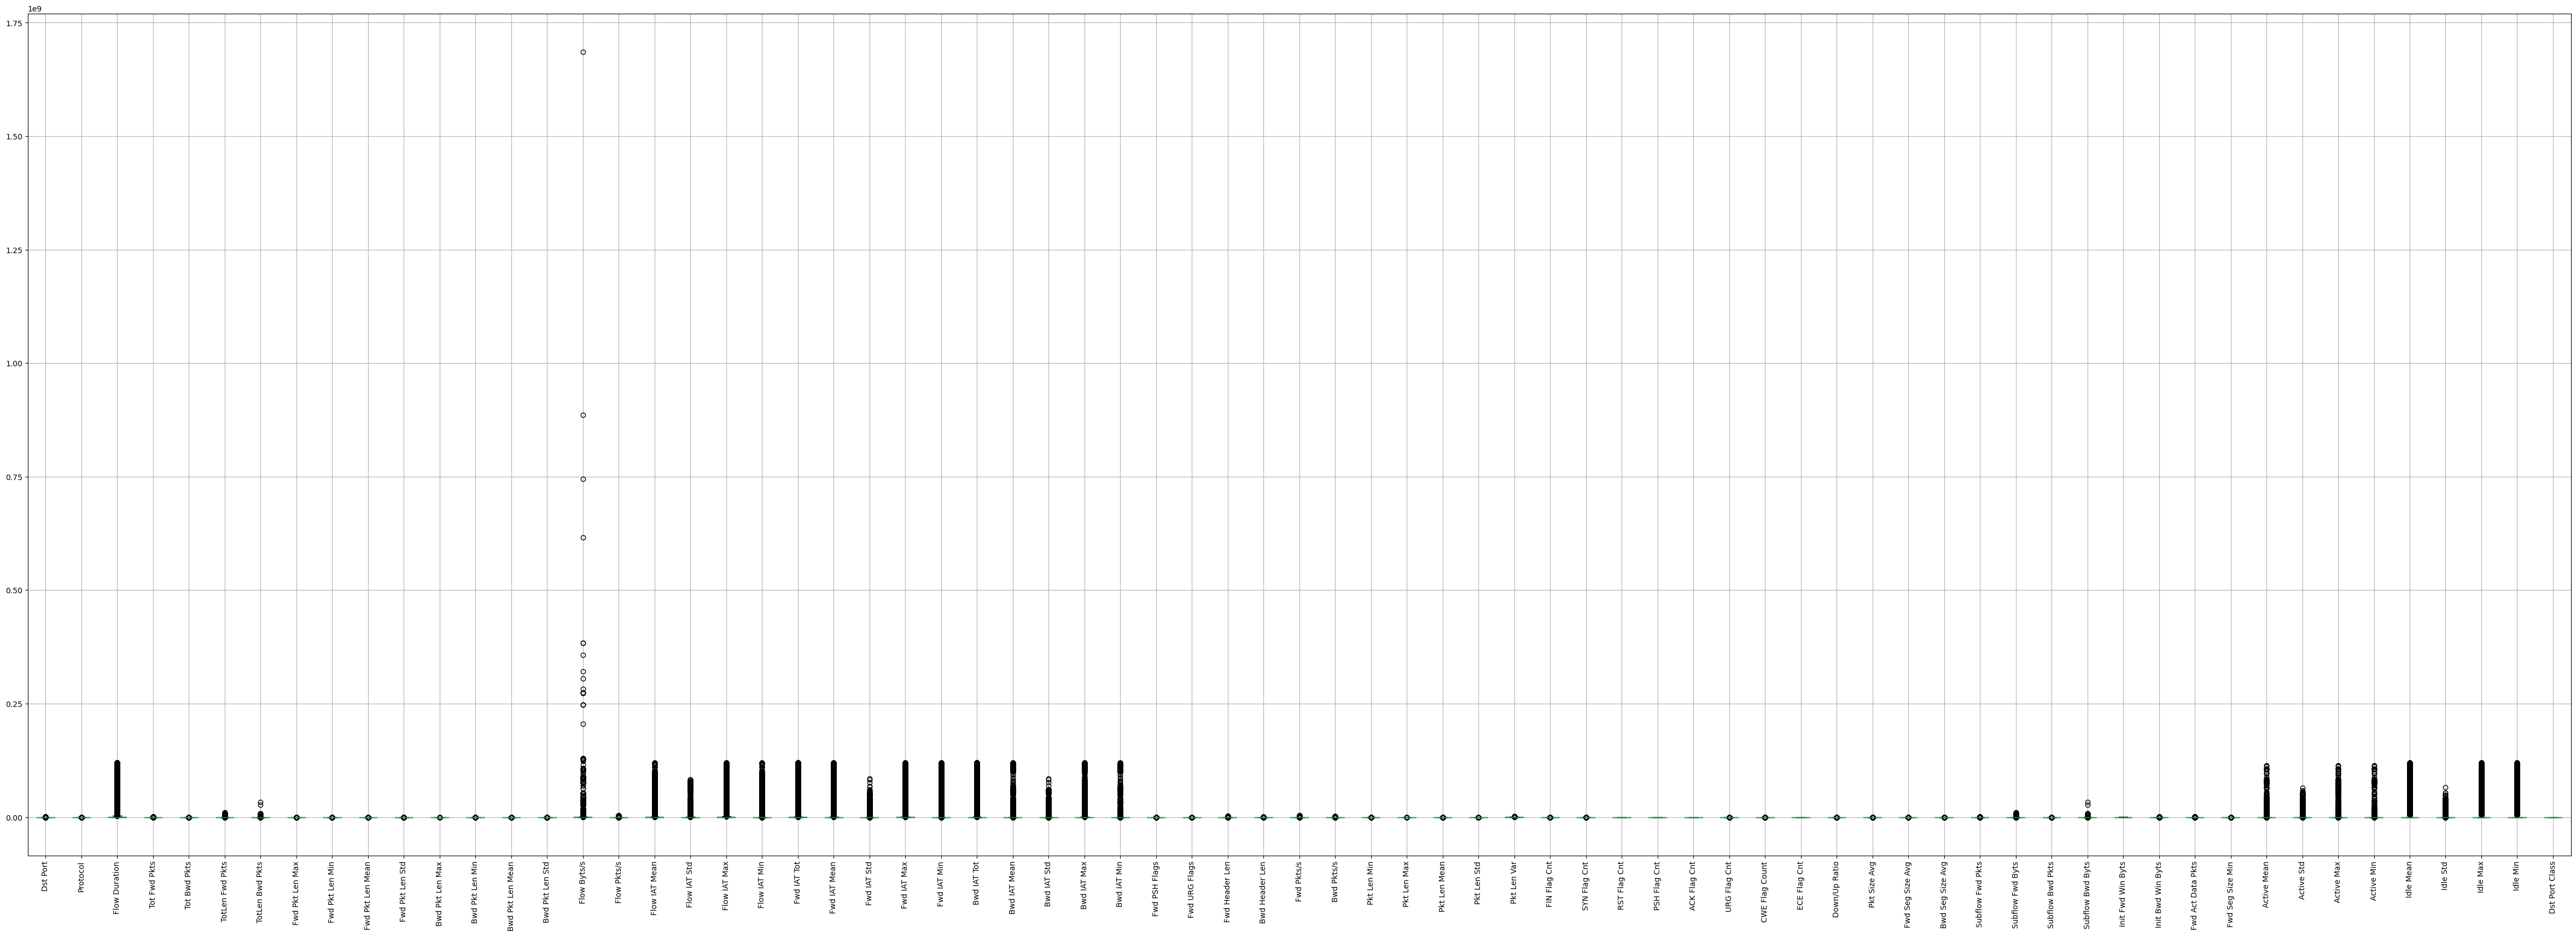

In [30]:
#Look for outliers
X_train.boxplot(figsize=(60, 20), rot=90)

In [31]:
#How many outliers are there? 1.25e8 se
X_train['Flow Byts/s'][X_train['Flow Byts/s'] > 1.25e+08].count()

30

In [32]:
y_train[X_train['Flow Byts/s'] > 1.25e+08].value_counts()

Label
Benign           27
Infilteration     3
Name: count, dtype: int64

There are about 30 outliers all on the "Flow Byts/s" feature. Majority of these outliers are Benign, so we can say that none of them are a particular feature of any attack vector. Hence best if we simply drop these features off the Training Set

In [33]:
#Drop those outliers from the Training Set
rowsToDrop = X_train[ X_train['Flow Byts/s'] >= 1.25e+08].index
X_train.drop(labels=rowsToDrop, axis=0, inplace=True)
y_train.drop(labels=rowsToDrop, axis=0, inplace=True)

<Axes: >

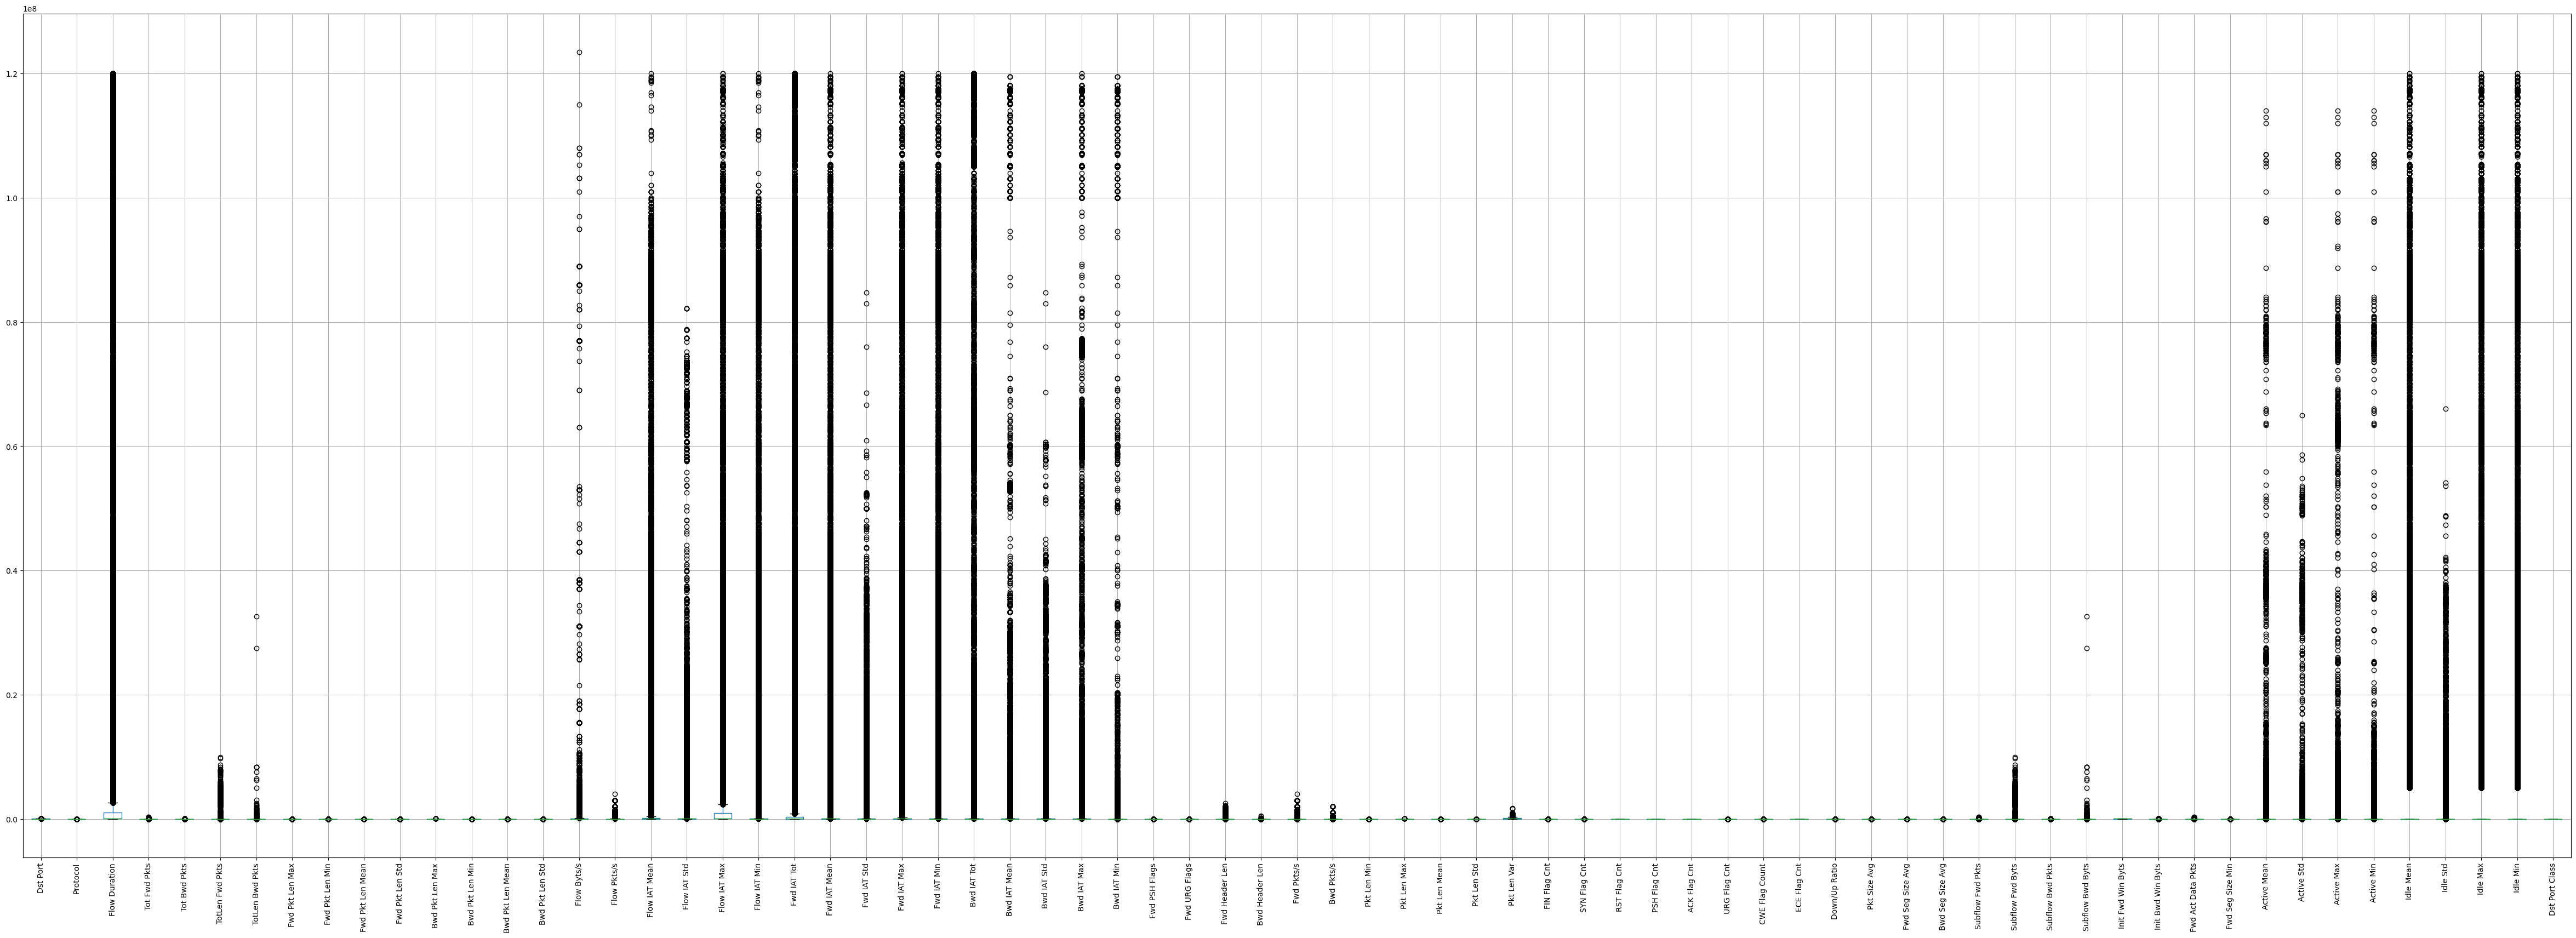

In [34]:
#Look for outliers again
X_train.boxplot(figsize=(60, 20), rot=90)

## Finalise Training Set

In [35]:
#Save the training set
filename_out = 'Inputs\\train_test_sets\\training.csv'
X_train.join(y_train).to_csv(filename_out, index=False)